In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.lstm_softplus_dropout_predictor import (
    LSTMSoftplusDropoutPredictor as Model,
)
from vol_predict.models.dl.lstm_softplus_predictor import (
    LSTMSoftplusPredictor as Baseline,
)

from run import initialize_runner, run_backtest

In [85]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2018-06-05 00:00:00 to 2018-08-31 22:00:00
Test data on 2018-09-15 01:00:00 to 2018-09-30 21:00:00
Num Train Iterations: 1939
Num Features: 1212


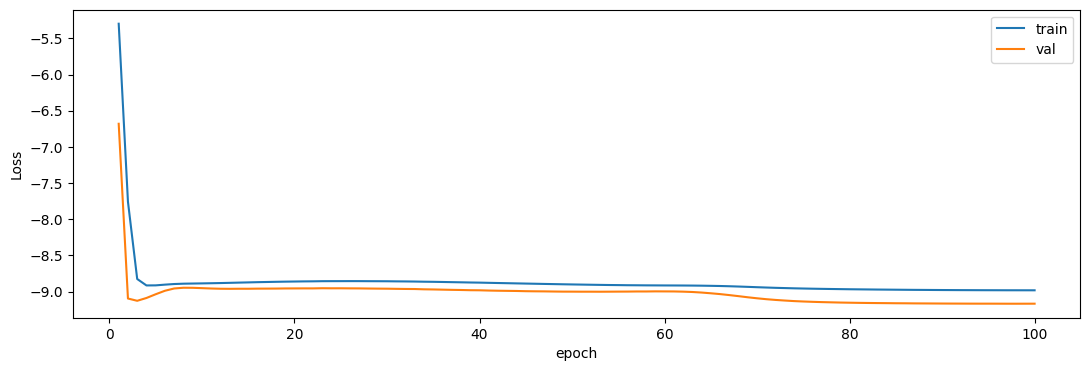

In [86]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 100
runner.model_config.hidden_size = 32
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [87]:
result.model_result

AssessmentResult:
* mean_model_loss = -9.126754
* mean_val_loss = -9.126754
* mean_pred_vol = 0.009192734025418758
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 0.000100940510

In [88]:
result.baseline_result

AssessmentResult:
* mean_model_loss = -9.528535
* mean_val_loss = -9.528535
* mean_pred_vol = 0.006815413478761911
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 0.000101206606